In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

# Приближение функций

Функция $y=f(x)$ задана таблицей значений $y_0, y_1, \ldots, y_n$ в точках $x_0, x_1, \ldots, x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_m(x)=a_0+a_1x+\ldots+a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина $\sigma_m = \sqrt{\frac{1}{n-m}\sum\limits_{k=0}^n(P_m(x_k)-y_k)^2}$ стабилизируется или начинает возрастать.

In [247]:
x = np.linspace(2.5, 5, 11)
y = [6.109, 2.615, -0.157, -2.010, -2.697, -3.615, -3.478, -2.250, 0.193, 2.086, 5.882]

In [248]:
def mnk(x, y, n, m):
    b = np.zeros(m+1)
    G = np.zeros((m+1, m+1))
    for j in range(m+1):
        for i in range(n+1):
            b[j] += y[i] * x[i]**j
            for k in range(m+1):
                G[j][k] += x[i]**(k+j)
    a = np.linalg.solve(G, b)
    return a

In [249]:
a = []
for i in range(len(x)-1):
    a.append(mnk(x, y, len(x)-1, i))
    
a0, a1, a2, a3, a4, a5, a6, a7, a8, a9 = a

In [172]:
def pm(a, m, t):
    p = 0
    for i in range(m+1):
        p += a[i] * t**i
    return p

In [162]:
def sigma(a, n, m):
    sig = 0
    for i in range(n+1):
        sig += (pm(a, m, x[i]) - y[i])**2
    return np.sqrt(1 / (n - m) * sig)

In [174]:
sig = []
for i in range(len(x)-1):
    sig.append(sigma(a[i], len(x)-1, i))

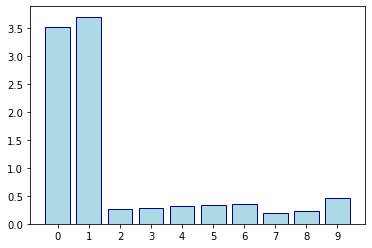

In [175]:
plt.bar(np.arange(len(x)-1), sig, color='lightblue', edgecolor='darkblue')
plt.xticks(np.arange(len(x)-1))
plt.show()

По графику видим, что $m^* = 7~-$ оптимальное значение степени многочлена
$P_{m^*}(x) = P_7(x)~-$ многочлен наилучшего среднеквадратичного приближения 

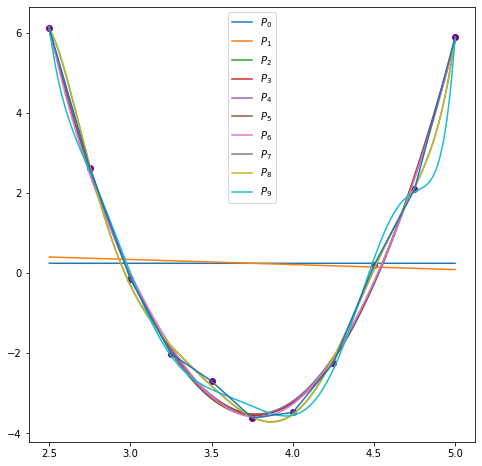

In [176]:
xx = np.linspace(2.5, 5, 10000)
plt.figure(figsize=(8, 8))
for i in range(len(x)-1):
    plt.plot(xx, pm(a[i], i, xx), label=f'$P_{i}$')
plt.scatter(x, y, color='purple')
plt.plot(x, y)
plt.legend()
plt.show()

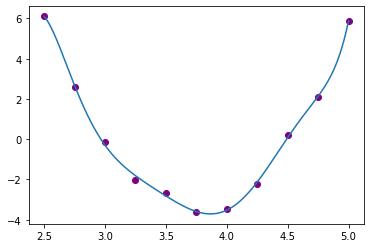

In [11]:
plt.plot(xx, pm(a[7], 7, xx), label='$P_7$')
plt.scatter(x, y, color='purple')
plt.show()

Известно, что $y = c_1\sin(a\pi x) + c_2\cos(b\pi x)$, где коэффициенты $c_1$ и $c_2$ подлежат определению. Используя метод наименьших квадратов, определить $c_1$ и $c_2$.

In [12]:
x = np.zeros(21)
for i in range(21):
    x[i] = -1 + 0.1 * i

y = np.array([0.8984, 1.0916, 1.0262, 0.802, 0.7105, 0.9056, 1.0958, 1.0365, 
    0.7972, 0.6868, 0.9066, 1.0858, 1.0128, 0.7833, 0.7028, 0.9035, 
    1.0815, 1.0366, 0.7552, 0.7185, 0.9218])

A, B = 4, 0

In [13]:
def sin(x):
    return np.sin(A * np.pi * x)
    
def cos(x):
    return np.cos(B * np.pi * x)

In [260]:
P = np.array([[sin(x[i]), cos(x[i])] for i in range(len(x))])
P

array([[-1.22464680e-15,  1.00000000e+00],
       [ 4.89982516e-15,  1.00000000e+00],
       [-1.46957616e-15,  1.00000000e+00],
       [-1.96067284e-15,  1.00000000e+00],
       [-1.71450552e-15,  1.00000000e+00],
       [ 5.38968388e-15,  1.00000000e+00],
       [-1.95943488e-15,  1.00000000e+00],
       [-1.47081412e-15,  1.00000000e+00],
       [-2.20436424e-15,  1.00000000e+00],
       [ 5.87954260e-15,  1.00000000e+00],
       [-2.44929360e-15,  1.00000000e+00]])

In [15]:
G = P.T @ P
b = P.T @ y

In [16]:
np.linalg.solve(G, b)

array([0.20336559, 0.90280952])

In [17]:
for i in range(len(x)):
    print(0.20336559*sin(x[i])+0.90280952*cos(x[i]))

0.9028095200000001
1.0962216895597086
1.0223448146257577
0.7832742253742423
0.7093973504402915
0.90280952
1.0962216895597086
1.0223448146257574
0.7832742253742423
0.7093973504402915
0.90280952
1.0962216895597086
1.0223448146257574
0.7832742253742423
0.7093973504402916
0.90280952
1.0962216895597086
1.0223448146257574
0.7832742253742424
0.7093973504402915
0.9028095199999999


Дана функция $y=f(x)$. Приблизить $f(x)$ на отрезке $[a, b]$ интерполяционными многочленами Лагранжа 1, 2 и 3 степеней. На одном чертеже построить графики приближающих многочленов и функции $f(x)$. Для многочлена 3 степени сравнить качество приближения при различном выборе узлов интерполяции.

In [244]:
def f(x):
    return 4**(np.cos(x))

a, b = 0.5, 1.5

In [245]:
x1 = np.array([0.5, 0.8, 1, 1.1])
x2 = np.array([0.6, 0.9, 1.2, 1.4])
x3 = np.array([0.5, 1, 1.5])
x4 = np.array([0.9, 1.2])
y1 = f(x1)
y2 = f(x2)
y3 = f(x3)
y4 = f(x4)
poly1 = lagrange(x1, y1)
poly2 = lagrange(x2, y2)
poly3 = lagrange(x3, y3)
poly4 = lagrange(x4, y4)

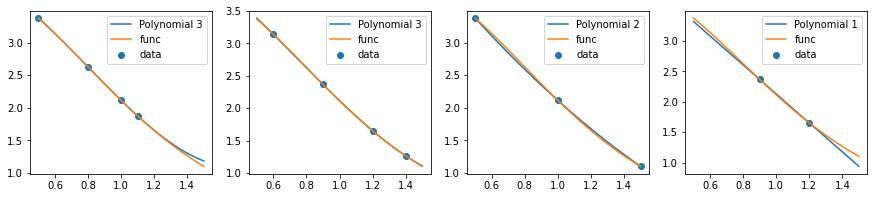

In [246]:
x_new = np.linspace(a,b,100)
fig, ax = plt.subplots(1, 4, figsize = (15, 3))
ax[0].scatter(x1, y1, label='data')
ax[1].scatter(x2, y2, label='data')
ax[2].scatter(x3, y3, label='data')
ax[3].scatter(x4, y4, label='data')

ax[0].plot(x_new, Polynomial(poly1.coef[::-1])(x_new), label='Polynomial 3')
ax[1].plot(x_new, Polynomial(poly2.coef[::-1])(x_new), label='Polynomial 3')
ax[2].plot(x_new, Polynomial(poly3.coef[::-1])(x_new), label='Polynomial 2')
ax[3].plot(x_new, Polynomial(poly4.coef[::-1])(x_new), label='Polynomial 1')
for i in range(4):
    ax[i].plot(x_new, f(x_new), label='func')
    ax[i].legend()
plt.show()

Дана функция $y=f(x)$. Приблизить $f(x)$ методом глобальной интерполяции при равномерном и чебышевском распределениях узлов интерполяции. Сравнить качество приближения.

In [251]:
def chebyshev_nodes(a, b, n):
    i = np.array(range(n))
    x = np.cos((2 * i + 1) * np.pi / (2 * n))
    return 0.5 * (b - a) * x + 0.5 * (b + a)

def f(x):
    return np.cos(np.e**x)

In [258]:
def poly_coeff(x, y):
    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])
    return a


def newton_polynomial(xdata, ydata, x):
    a = poly_coeff(xdata, ydata)
    n = len(xdata) - 1
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - xdata[n - k]) * p
    return p

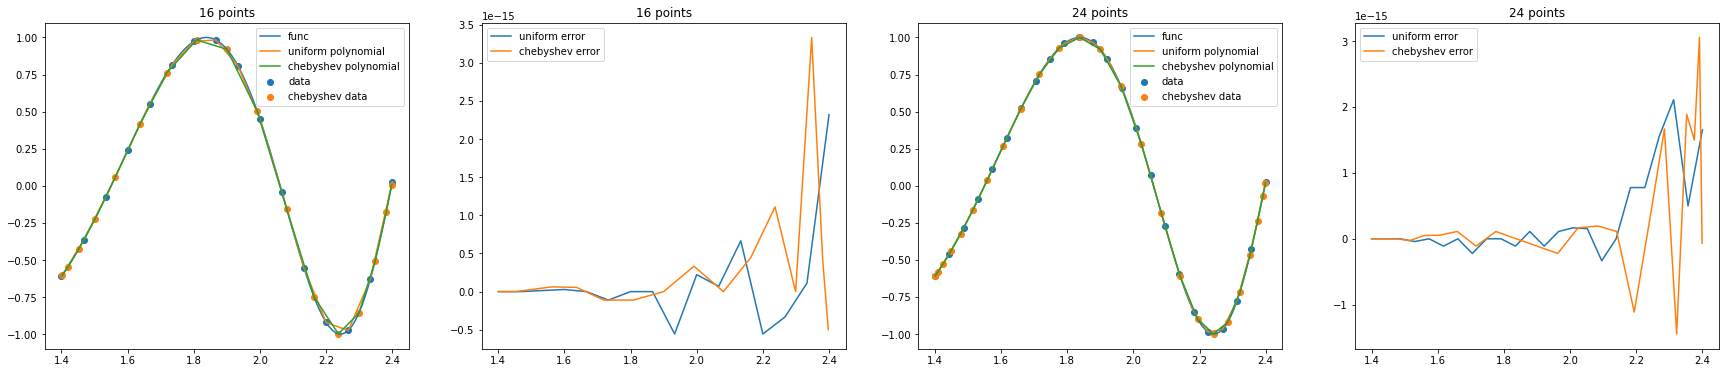

In [262]:
a, b = 1.4, 2.4
k = 8
n1 = 3 * k
n2 = 2 * k
x3 = np.linspace(a, b, 3 * k)
chebyshev_x3 = chebyshev_nodes(a, b, n1+1)
x2 = np.linspace(a, b, 2 * k)
chebyshev_x2 = chebyshev_nodes(a, b, n2+1)
chebyshev_x2.sort()
chebyshev_x3.sort()

y2 = f(x2)
chebyshev_y2 = f(chebyshev_x2)
y3 = np.cos(np.exp(x3))
chebyshev_y3 = np.cos(np.exp(chebyshev_x3))

poly2 = np.array(newton_polynomial(x2, y2, x2))
poly3 = np.array(newton_polynomial(x3, y3, x3))
chebyshev_poly2 = np.array(newton_polynomial(chebyshev_x2, chebyshev_y2, chebyshev_x2))
chebyshev_poly3 = np.array(newton_polynomial(chebyshev_x3, chebyshev_y3, chebyshev_x3))

fig, ax = plt.subplots(1, 4, figsize=(30,6))


x0 = np.linspace(a, b, 100)

ax[0].plot(x0, f(x0), label='func')
ax[0].plot(x2, inter, label='uniform polynomial')
ax[0].plot(chebyshev_x2, chebyshev_poly2, label='chebyshev polynomial')
ax[0].scatter(x2, y2, label='data')
ax[0].scatter(chebyshev_x2, chebyshev_y2, label='chebyshev data')
ax[0].legend()
ax[0].set_title(f'{2 * k} points')

ax[2].plot(x0, f(x0), label='func')
ax[2].plot(x3, poly3, label='uniform polynomial')
ax[2].plot(chebyshev_x3, chebyshev_poly3, label='chebyshev polynomial')
ax[2].scatter(x3, y3, label='data')
ax[2].scatter(chebyshev_x3, chebyshev_y3, label='chebyshev data')
ax[2].legend()
ax[2].set_title(f'{3 * k} points')

ax[1].plot(x2, y2 - inter, label='uniform error')
ax[1].plot(chebyshev_x2, chebyshev_y2 - chebyshev_poly2, label='chebyshev error')
ax[1].legend()
ax[1].set_title(f'{2 * k} points')

ax[3].plot(x3, y3 - wide_inter, label='uniform error')
ax[3].plot(chebyshev_x3, chebyshev_y3 - chebyshev_poly3, label='chebyshev error')
ax[3].legend()
ax[3].set_title(f'{3 * k} points')
plt.show()